# stock price trends prediction using LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("1_dec_2014 to 30_nov_2019.csv")


In [3]:
train.shape

(1259, 7)

In [4]:
test = pd.read_csv("1_dec_2019 to 31_dec_2019.csv")
test.shape

(20, 7)

In [5]:
train_data = train.iloc[:,1].values

In [6]:
train_data = train_data.reshape(-1,1)

In [7]:
train_data.shape

(1259, 1)

# Feature Scalling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_data)

In [9]:
train_scaled

array([[0.0526017 ],
       [0.04619439],
       [0.04373371],
       ...,
       [0.97334684],
       [0.97947375],
       [0.97008076]])

In [10]:
len(train_scaled)

1259

In [11]:
x_train = []
y_train = []
for i in range(60,len(train_scaled)):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])

np.shape(x_train)

(1199, 60)

In [12]:
np.shape(y_train)

(1199,)

In [13]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [14]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [15]:
x_train.shape

(1199, 60, 1)

# Building RNN network

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [17]:
# initializing the RNN
regressor = Sequential()

# adding the first LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# adding 2nd LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# adding the 3rd LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# adding the 4th LSTM layer

regressor.add(LSTM(units = 50))
regressor.add(Dropout(rate=0.2))

# final output layer
regressor.add(Dense(units=1))

regressor.compile(optimizer = "adam", loss = "mean_squared_error")

In [18]:
regressor.fit(x_train, y_train, batch_size= 32, epochs = 150)

Epoch 1/150
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0346
Epoch 2/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 3/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 4/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/150
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0058
Epoch 6/150
1199/1199 [==============================] - 5s 5ms/step - loss: 0.0052
Epoch 7/150
1199/1199 [==============================] - 5s 5ms/step - loss: 0.0046
Epoch 8/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 9/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 10/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 11/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 12/150
1199/1199 [==============================] - 6s 5ms/step - lo

1199/1199 [==============================] - 7s 5ms/step - loss: 0.0016
Epoch 97/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 98/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 99/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 100/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 101/150
1199/1199 [==============================] - 5s 5ms/step - loss: 0.0014
Epoch 102/150
1199/1199 [==============================] - 5s 5ms/step - loss: 0.0014
Epoch 103/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 104/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 105/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 106/150
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 107/150
1199/1199 [==============================] - 6s 5ms/step 

In [19]:
# saving trained model to disk

# serialize model to json
model_json = regressor.to_json()
with open("lstm_model.json", "w") as json_file:
    json_file.write(model_json)
    
# to save weights to hdf5 file
regressor.save_weights("lstm_weights.h5")

In [20]:
# to load pretrained model from disk
from keras.models import model_from_json

#loading json and creating model
json_file = open("lstm_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()

# to create our model
loaded_regressor_model = model_from_json(loaded_model_json)
# to load weights
loaded_regressor_model.load_weights("lstm_weights.h5")

# Predictions from our model

In [21]:
train = pd.read_csv("1_dec_2014 to 30_nov_2019.csv")
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-01,537.424500,539.927612,530.403748,532.338440,532.338440,2115300
1,2014-12-02,532.049255,534.033813,528.349426,532.288574,532.288574,1526600
2,2014-12-03,529.984924,534.528442,527.810913,529.865234,529.865234,1277900
3,2014-12-04,529.705688,535.868774,527.142700,535.838867,535.838867,1392100
4,2014-12-05,529.546143,531.430969,522.844543,523.821838,523.821838,2565600


In [22]:
train_data = train.iloc[:,1:2].values
train_data.shape

(1259, 1)

In [23]:
test = pd.read_csv("1_dec_2019 to 31_dec_2019.csv")
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,1301.000000,1305.829956,1281.000000,1289.920044,1289.920044,1510900
1,2019-12-03,1279.569946,1298.461060,1279.000000,1295.280029,1295.280029,1143800
2,2019-12-04,1307.010010,1325.800049,1304.869995,1320.540039,1320.540039,1537500
3,2019-12-05,1328.000000,1329.358032,1316.439941,1328.130005,1328.130005,1212700
4,2019-12-06,1333.439941,1344.000000,1333.439941,1340.619995,1340.619995,1314800


In [24]:
test_data = test.iloc[:,1:2].values
test_data.shape

(20, 1)

In [25]:
total_data = pd.concat((train["Open"], test["Open"]),axis = 0)

In [26]:
type(total_data)

pandas.core.series.Series

In [27]:
inputs = total_data[len(train)-60:].values

In [28]:
inputs.shape

(80,)

In [29]:
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [30]:
inputs.shape

(80, 1)

In [31]:
x_test = []
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)

In [32]:
x_test.shape

(20, 60)

In [33]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [34]:
x_test.shape

(20, 60, 1)

In [35]:
predicted_price = loaded_regressor_model.predict(x_test)

In [36]:
predicted_stock_price = scaler.inverse_transform(predicted_price)


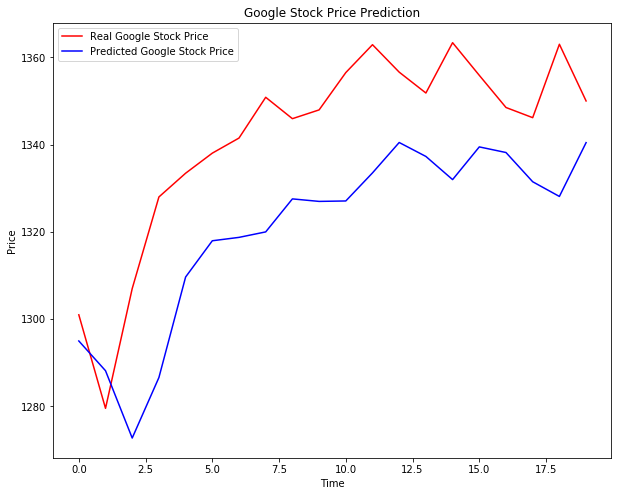

In [37]:
plt.figure(figsize=(10,8))
plt.plot(test_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
